## importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from google.colab import files
uploaded = files.upload()
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")


Saving test.csv to test.csv
Saving train.csv to train.csv


## dataset information

🔹 First few rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            37

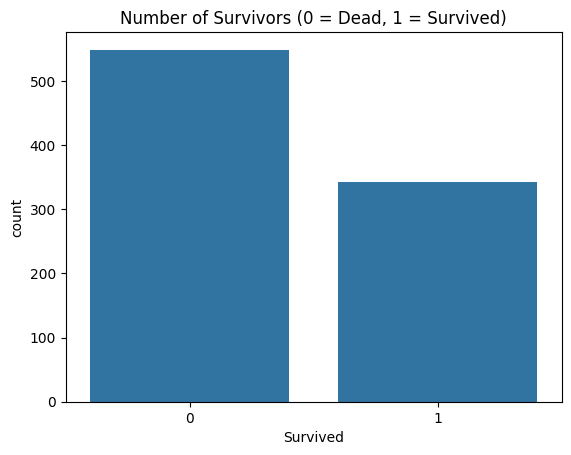

In [2]:
print("🔹 First few rows of the dataset:")
print(train_df.head())
print('\n')

print("🔹 General information:")
print(train_df.info())
print('\n')

print("🔹 Missing values in each column:")
print(train_df.isnull().sum())
print('\n')

print("🔹 Descriptive statistics:")
print(train_df.describe())
print('\n')

# Visualization: Survivors count
sns.countplot(data=train_df, x="Survived")
plt.title("Number of Survivors (0 = Dead, 1 = Survived)")
plt.show()
print('\n')


# preprocessing

In [3]:
# Load datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [4]:
# Separate target variable
X = train_df.drop("Survived", axis=1)
y = train_df["Survived"]

In [5]:
# Preprocessing
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
categorical_features = ['Pclass', 'Sex', 'Embarked']

In [6]:
# Create transformers
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [7]:
# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [8]:
# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)

# training

In [9]:
# Define models and parameter grids
models = {
    "Logistic Regression": (LogisticRegression(max_iter=1000), {'C': [0.1, 1, 10]}),
    "Random Forest": (RandomForestClassifier(random_state=42), {'n_estimators': [50, 100, 200], 'max_depth': [4, 6, 8]}),
    "SVM": (SVC(random_state=42), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    "KNN": (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    "Gradient Boosting": (GradientBoostingClassifier(random_state=42), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1]})
}

In [10]:
# Train and evaluate models
results = {}
for name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    results[name] = {'accuracy': accuracy, 'best_params': grid_search.best_params_}

# results

In [11]:
# Print results
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Best Parameters: {result['best_params']}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print("")

Model: Logistic Regression
Best Parameters: {'C': 0.1}
Accuracy: 0.7989

Model: Random Forest
Best Parameters: {'max_depth': 6, 'n_estimators': 200}
Accuracy: 0.8212

Model: SVM
Best Parameters: {'C': 1, 'kernel': 'rbf'}
Accuracy: 0.8156

Model: KNN
Best Parameters: {'n_neighbors': 5}
Accuracy: 0.8156

Model: Gradient Boosting
Best Parameters: {'learning_rate': 0.01, 'n_estimators': 200}
Accuracy: 0.7933



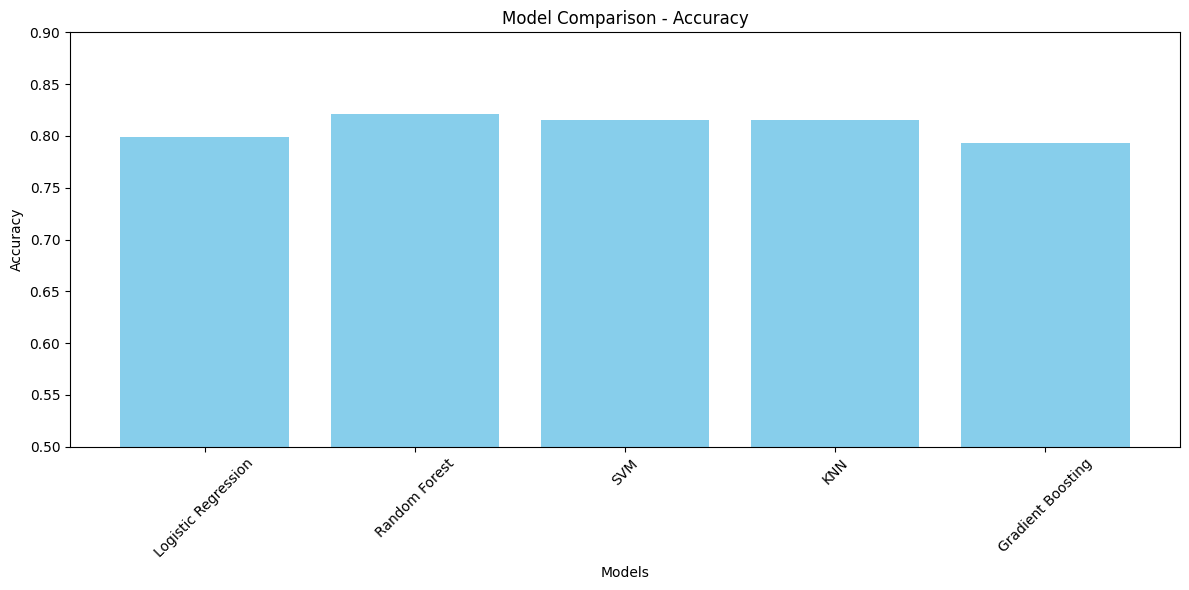

In [12]:
# Plotting the results
model_names = list(results.keys())
accuracies = [result['accuracy'] for result in results.values()]

plt.figure(figsize=(12, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.ylim(0.5, 0.9)  # Set y-axis limit for better visualization
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison - Accuracy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()